# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?



A base escolhida foi - Reuters Corpus Volume I - https://scikit-learn.org/stable/datasets/index.html#id9

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
    
	Number of instances (observations):  581,012
	Number of Attributes:	
		12 features
    Name                                     Data Type    Measurement                       Description

Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
Hillshade_Noon                          quantitative    0 to 255 index               Hillshade index at noon, summer soltice
Hillshade_3pm                           quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points      quantitative    meters                       Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns)      qualitative     0 (absence) or 1 (presence)  Wilderness area designation
Soil_Type (40 binary columns)           qualitative     0 (absence) or 1 (presence)  Soil Type designation
Cover_Type (7 types)                    integer         1 to 7                       Forest Cover Type designation

- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

*Indique o método escolhido*

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
from sklearn.datasets import fetch_rcv1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [0]:
#Demora alguns minutos para rodar...
rcv1 = fetch_rcv1()

In [0]:
matriz = rcv1

print("A matriz possui %d linhas" % len(matriz))

A matriz possui 5 linhas


In [0]:

print("A matriz possui %d colunas" % len(matriz[0]))

KeyError: ignored

In [0]:
print(rcv1.DESCR)

.. _rcv1_dataset:

RCV1 dataset
------------

Reuters Corpus Volume I (RCV1) is an archive of over 800,000 manually 
categorized newswire stories made available by Reuters, Ltd. for research 
purposes. The dataset is extensively described in [1]_.

**Data Set Characteristics:**

    ==============     =====================
    Classes                              103
    Samples total                     804414
    Dimensionality                     47236
    Features           real, between 0 and 1
    ==============     =====================

:func:`sklearn.datasets.fetch_rcv1` will load the following 
version: RCV1-v2, vectors, full sets, topics multilabels::

    >>> from sklearn.datasets import fetch_rcv1
    >>> rcv1 = fetch_rcv1()

It returns a dictionary-like object, with the following attributes:

``data``:
The feature matrix is a scipy CSR sparse matrix, with 804414 samples and
47236 features. Non-zero values contains cosine-normalized, log TF-IDF vectors.
A nearly chronologi

In [0]:
rcv1.data

<804414x47236 sparse matrix of type '<class 'numpy.float64'>'
	with 60915113 stored elements in Compressed Sparse Row format>

In [0]:
 rcv1.data.shape
 # matriz com 804414 amostras e 47236 recursos

(804414, 47236)

In [0]:
#Cada amostra pode ser identificada por seu ID, variando (com intervalos) de 2286 a 810596:
rcv1.sample_id[:3]

array([2286, 2287, 2288], dtype=uint32)

In [0]:
#Os valores de destino são os tópicos de cada amostra. Cada amostra pertence a pelo menos um tópico e até 17 tópicos. Existem 103 tópicos, cada um representado por uma sequência. Suas frequências de corpus abrangem cinco ordens de magnitude, de 5 ocorrências para 'GMIL' a 381327 para 'CCAT':
rcv1.target_names[:4].tolist()

['C11', 'C12', 'C13', 'C14']

In [0]:
rcv1.LEWISSPLIT

AttributeError: ignored

In [0]:
from nltk.corpus import reuters 
 def collection_stats():
    # List of documents
    documents = reuters.fileids()
    print(str(len(documents)) + " documents");
 
    train_docs = list(filter(lambda doc: doc.startswith("train"),documents));
    print(str(len(train_docs)) + " total train documents");
 
    test_docs = list(filter(lambda doc: doc.startswith("test"),documents));
    print(str(len(test_docs)) + " total test documents");


In [0]:
# List of categories
    categories = reuters.categories();
    print(str(len(categories)) + " categories");
 
    # Documents in a category
    category_docs = reuters.fileids("acq");
 
    # Words for a document
    document_id = category_docs[0]
    document_words = reuters.words(category_docs[0]);
    print(document_words);  
 
    # Raw document
    print(reuters.raw(document_id));

ValueError: ignored

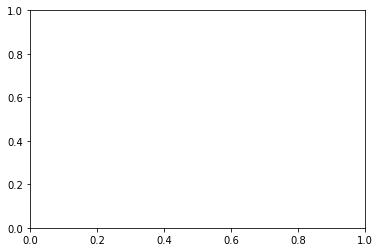

In [0]:
n_components = 150
pca = RandomizedPCA(n_components=n_components, whiten=True, random_state=42)
fig, ax = plt.subplots(1,1)
ax.imshow(rcv1.data[0].reshape(62, 47), cmap='gray')
ax.set_xlabel(rcv1.target_names[faces.target[0]])
plt.show()

In [0]:
rcv1.data.shape

In [0]:
rcv1.target.shape

In [0]:
rcv1.sample_id[:3]

In [0]:
rcv1.target_names[:3].tolist()

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.5) Qual método escolhido?

Indique o método escolhido

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*